In [17]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv3D, MaxPooling3D, BatchNormalization, GlobalAveragePooling3D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
def preprocess_data(data_dir, target_size=(224, 224), frames_per_video=20):
    X = []
    y = []

    for class_name in os.listdir(data_dir):
        i = 1
        print("\n\n\n ", class_name, " \n\n\n", class_name, " \n\n\n", class_name, " \n\n\n", class_name, " \n\n\n")
        class_dir = os.path.join(data_dir, class_name)
        for video_file in os.listdir(class_dir):
            print("Video", i, "is in execution")
            i += 1
            video_path = os.path.join(class_dir, video_file)
            cap = cv2.VideoCapture(video_path)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            frame_indices = np.linspace(0, frame_count - 1, frames_per_video, dtype=int)

            frames = []
            for i in frame_indices:
                cap.set(cv2.CAP_PROP_POS_FRAMES, i)
                ret, frame = cap.read()
                if ret:
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame = cv2.resize(frame, target_size)
                    frames.append(frame)

            X.append(frames)
            if class_name == 'Anomaly':
                y.append(1)
            else:
                y.append(0)

            cap.release()

    X = np.array(X)
    y = np.array(y)
    print("Video data preprocessed successfully!")

    return X, y



In [3]:
def build_model(input_shape=(20, 224, 224, 3), num_classes=2):
    inputs = Input(shape=input_shape)

    x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling3D()(x)

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    tf.print("Model is built successfully!")

    return model


In [4]:
def train_model(X_train, y_train, X_val, y_val):
    model = build_model()
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])
    tf.print("Trained successfully!")

    return model, history

In [5]:
def test_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    tf.print(f'Test Loss: {loss}')
    tf.print(f'Test Accuracy: {accuracy}')

In [7]:
data_dir = './Data_UrbanGuard'
X, y = preprocess_data(data_dir)




  Anomaly  


 Anomaly  


 Anomaly  


 Anomaly  



Video 1 is in execution
Video 840 is in execution
Video 578 is in execution
Video 460 is in execution
Video 461 is in execution
Video 475 is in execution
Video 458 is in execution
Video 474 is in execution
Video 451 is in execution
Video 461 is in execution
Video 472 is in execution
Video 457 is in execution
Video 460 is in execution
Video 596 is in execution
Video 450 is in execution
Video 463 is in execution
Video 457 is in execution
Video 464 is in execution
Video 479 is in execution
Video 461 is in execution
Video 457 is in execution
Video 460 is in execution
Video 456 is in execution
Video 459 is in execution
Video 400 is in execution
Video 472 is in execution
Video 462 is in execution
Video 461 is in execution
Video 478 is in execution
Video 472 is in execution
Video 474 is in execution
Video 461 is in execution
Video 463 is in execution
Video 456 is in execution
Video 456 is in execution
Video 574 is in execution
Video 477

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [18]:
model, history = train_model(X_train, y_train, X_val, y_val)

Model is built successfully!
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7512 - loss: 0.4756
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.7531 - loss: 0.4740 - val_accuracy: 1.0000 - val_loss: 0.0412
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9381 - loss: 0.1793
Epoch 2: val_accuracy did not improve from 1.00000
41/41 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9381 - loss: 0.1793 - val_accuracy: 0.9722 - val_loss: 0.0736
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9577 - loss: 0.1237
Epoch 3: val_accuracy did not improve from 1.00000
41/41 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.9572 - loss: 0.1244 - val_accuracy: 1.0000 - val_loss: 0.0358
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9291 - loss: 0.1940
Epoch 4: val_accuracy did not improve from 1.00000
41/41 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 

In [19]:
test_model(model, X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 1.0000 - loss: 0.0437
Test Loss: 0.038791682571172714
Test Accuracy: 1.0


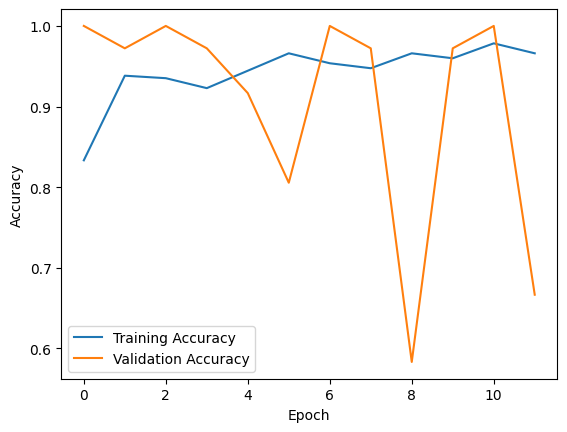

In [20]:
# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

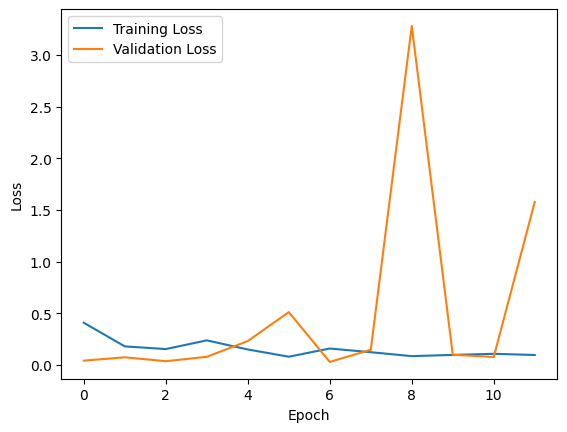

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
video_path = r"C:\Users\pavan\StudioProjects\Python Projects [Data Science]\Jupyter_Projects\UrbanGuard\Data_UrbanGuard\Anomaly\Anomaly_10.mp4"
def preprocess_single_video(video_path, target_size=(224, 224), frames_per_video=20):
    X = []

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, frame_count - 1, frames_per_video, dtype=int)

    frames = []
    for i in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, target_size)
            frames.append(frame)

    X.append(frames)

    cap.release()

    X = np.array(X)
    print("Video preprocessed successfully!")

    return X

def predict_single_video(model, video_path):

    X = preprocess_single_video(video_path)

    predictions = model.predict(X)

    return predictions



In [24]:
from tensorflow.keras.models import load_model

model = load_model('./best_model.keras')  

class_labels = ['Normal', 'Anomaly']

video_path = r"C:\Users\pavan\StudioProjects\Python Projects [Data Science]\Jupyter_Projects\UrbanGuard\Data_UrbanGuard\Normal\Normal_34.mp4"

predictions = predict_single_video(model, video_path)

predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)


Video preprocessed successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Predicted class: Normal
